In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
#read in data
dataset = pd.read_csv('data/data.csv')

In [3]:
print(min(dataset['danceability']))
print(max(dataset['danceability']))

0.0
0.988


In [4]:
def classify_value(val):
    if val < 0.25:
        return 'low'
    elif 0.25 <= val <= 0.75:
        return 'medium'
    else:
        return 'high'

In [5]:
dataset['dancerange'] = dataset['danceability'].apply(classify_value)

In [6]:
features = ['valence', 'acousticness', 'energy','instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']
x = dataset.loc[:, features].values
y = dataset['dancerange'].values

In [7]:
#Split data into train, test, validation sets
train_ratio = 0.80
validation_ratio = 0.15
test_ratio = 0.20

# train is now 75% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1 - train_ratio)

# # test is now 10% of the initial data set
# # validation is now 15% of the initial data set
# x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 


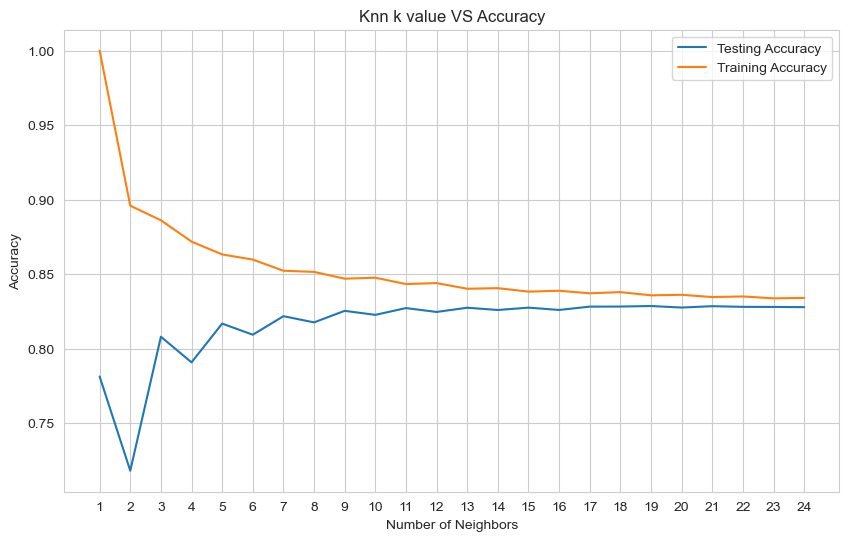

Best accuracy is 0.8286015645600774 with K = 19


In [8]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

plt.figure(figsize=[10,6])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Knn k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [19]:
knn = KNeighborsClassifier(n_neighbors = 19)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=19) train accuracy is: ',knn.score(x_train,y_train))
print('With KNN (K=19) test accuracy is: ',knn.score(x_test,y_test))

With KNN (K=19) train accuracy is:  0.8357920335184073
With KNN (K=19) test accuracy is:  0.8286015645600774


In [58]:
def get_danceability_classification(song_name, artist, dataset):
    # Convert song_name and artist to lowercase for comparison
    song_name_lower = song_name.lower()
    artist_lower = artist.lower().split(", ")

    # Search for the song in the dataset with lowercase comparison
    matching_songs = dataset[dataset['name'].str.lower() == song_name_lower]

    # Filtering songs that match any of the artist names provided
    matching_songs = matching_songs[matching_songs['artists'].apply(
        lambda x: any(artist_part.strip().lower() in x.lower() for artist_part in artist_lower)
    )]

    if len(matching_songs) == 1:
        # Assuming 'features' and 'knn' are defined earlier in your code
        song_features = matching_songs[features].values
        dance_range_prediction = knn.predict(song_features)
        return dance_range_prediction[0]
    elif len(matching_songs) > 1:
        return "Multiple songs found with the same name and artist. Please specify further."
    else:
        return "Song not found in the dataset."


In [59]:
duplicates = dataset.duplicated(subset=['name', 'artists'], keep=False)
duplicate_songs = dataset[duplicates]
duplicate_count = duplicate_songs.shape[0]


dataset_cleaned = dataset.drop_duplicates(subset=['name', 'artists'])


post_removal_count = dataset_cleaned.duplicated(subset=['name', 'artists']).sum()

In [62]:
# User input section
song_input = input("Please enter a song name: ")
artist_input = input("Please enter the artist of the song. If there are multiple artists, input the names separated by a comma and a space e.g Person A, Person B: ")

In [63]:
# Get the danceability classification
predicted_danceability = get_danceability_classification(song_input, artist_input, dataset_cleaned)
print("Predicted danceability classification:", predicted_danceability)

Predicted danceability classification: medium
